In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

print(df.isnull().sum())


VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        36
Base MSRP                                             36
Legislative District                                 494
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [2]:

### 1️. Handling Missing Values ###

for col in ["County", "City", "Postal Code", "Electric Utility", "2020 Census Tract"]:
    df[col] = df[col].fillna(df[col].mode()[0])  # Fill categorical missing values with mode

for col in ["Electric Range", "Base MSRP"]:
    df[col] = df[col].fillna(df[col].median())  # Fill numerical missing values with median


df.dropna(subset=["Legislative District", "Vehicle Location"], inplace=True)

# Drop rows with missing geo data

In [3]:
### 2️. Summary Statistics ###
print("Summary Statistics:\n", df.describe())

Summary Statistics:
          Postal Code     Model Year  Electric Range      Base MSRP  \
count  235191.000000  235191.000000   235191.000000  235191.000000   
mean    98269.331416    2021.407928       46.241706     785.658529   
std       310.577958       2.992152       84.026789    7170.053376   
min     98001.000000    2000.000000        0.000000       0.000000   
25%     98052.000000    2020.000000        0.000000       0.000000   
50%     98126.000000    2023.000000        0.000000       0.000000   
75%     98375.000000    2024.000000       38.000000       0.000000   
max     99403.000000    2025.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         235191.000000    2.351910e+05       2.351910e+05  
mean              28.879813    2.353300e+08       5.304009e+10  
std               14.904769    6.799548e+07       1.644185e+07  
min                1.000000    4.385000e+03       5.300195e+10  
25%               17.00

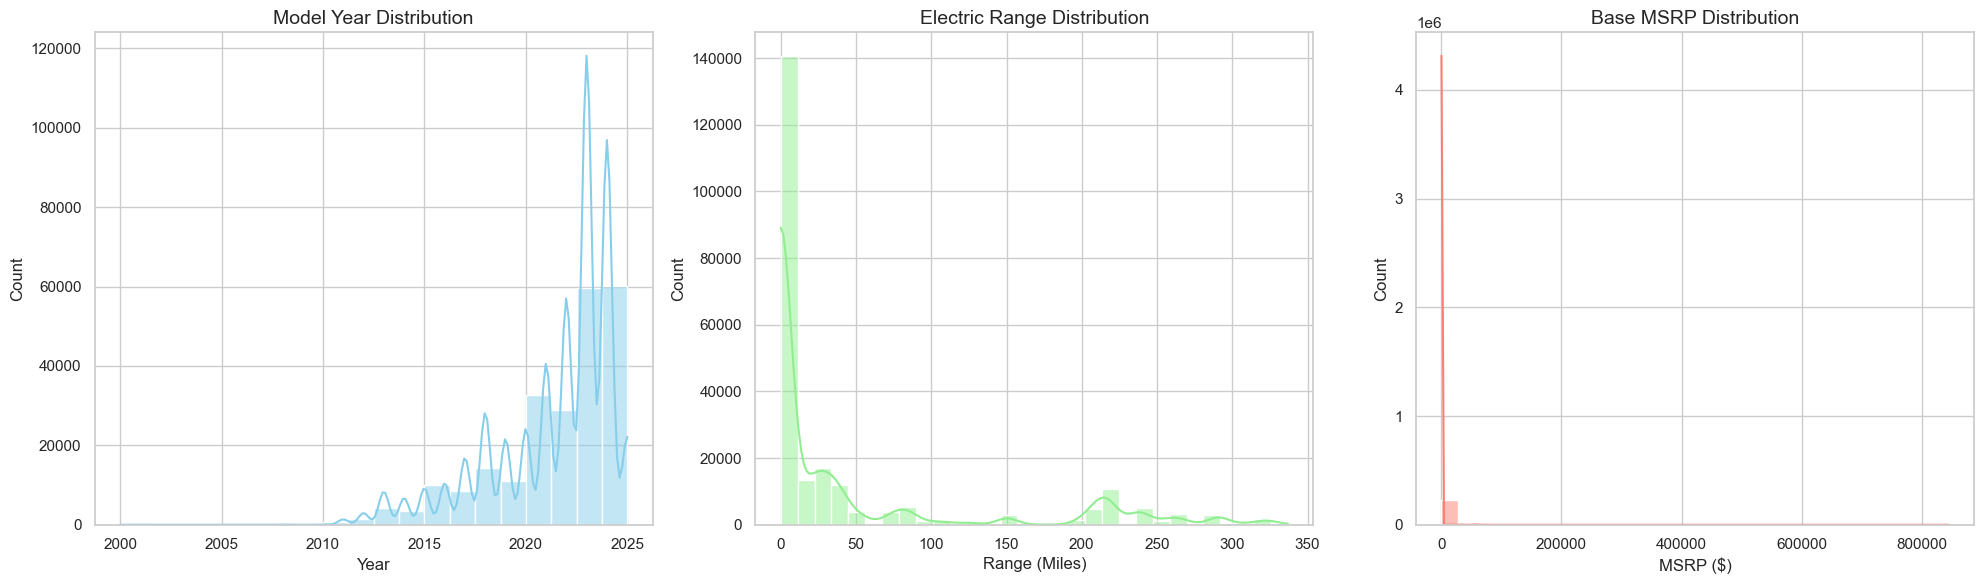

In [48]:

# Set style
sns.set(style="whitegrid")

# Create 1 row and 3 column subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1️ Model Year Distribution
sns.histplot(data=df, x="Model Year", bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Model Year Distribution", fontsize=14)
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Count")

# Electric Range Distribution
sns.histplot(data=df, x="Electric Range", bins=30, kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title("Electric Range Distribution", fontsize=14)
axes[1].set_xlabel("Range (Miles)")
axes[1].set_ylabel("Count")

# Base MSRP Distribution (if available)
if "Base MSRP" in df.columns:
    sns.histplot(data=df, x="Base MSRP", bins=30, kde=True, ax=axes[2], color='salmon')
    axes[2].set_title("Base MSRP Distribution", fontsize=14)
    axes[2].set_xlabel("MSRP ($)")
    axes[2].set_ylabel("Count")
else:
    axes[2].axis('off')
    axes[2].text(0.5, 0.5, 'Base MSRP\nNot Available', ha='center', va='center', fontsize=12)

# Space adjustment
plt.tight_layout()
plt.show()


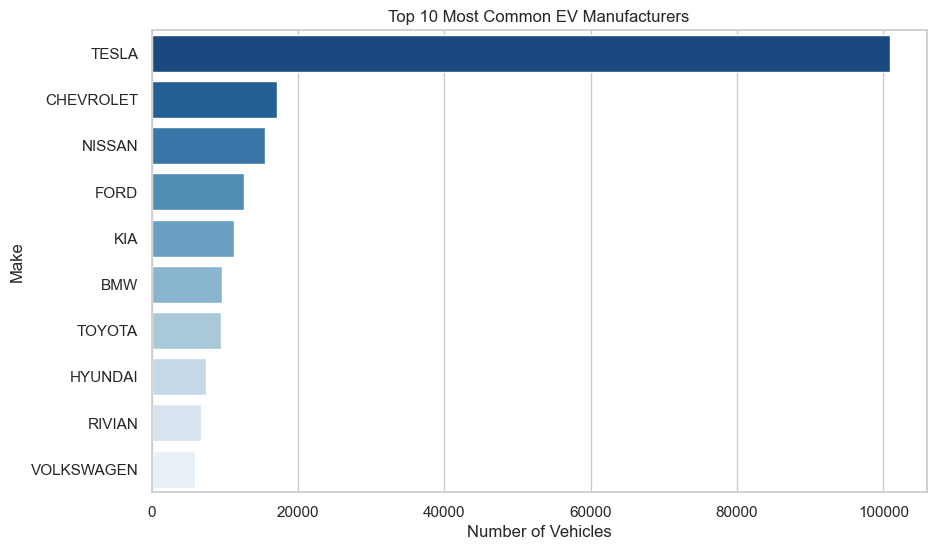

In [32]:
###  Analyzing Top 10 EV Manufacturers ###
top_makes = df["Make"].value_counts().head(10)

# Plot Top EV Makes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_makes.values, y=top_makes.index, hue=top_makes.index, palette="Blues_r", legend=False)
plt.title("Top 10 Most Common EV Manufacturers")
plt.xlabel("Number of Vehicles")
plt.show()

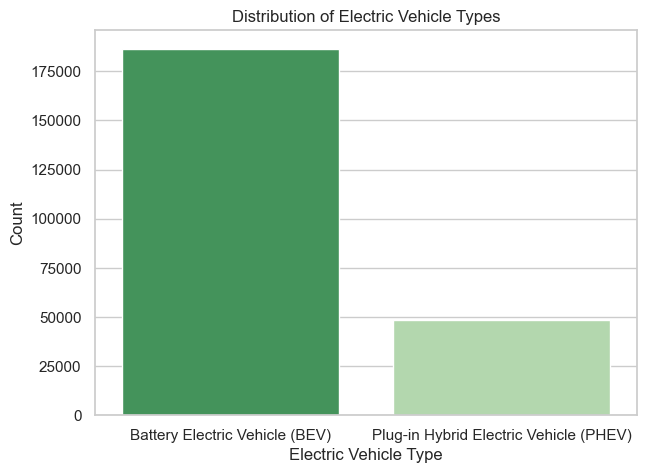

In [36]:
### 5️. EV Type Distribution ###
ev_type_counts = df["Electric Vehicle Type"].value_counts()
plt.figure(figsize=(7, 5))
sns.barplot(x=ev_type_counts.index, y=ev_type_counts.values, hue=ev_type_counts.index, palette="Greens_r", legend=False)
plt.title("Distribution of Electric Vehicle Types")
plt.ylabel("Count")
plt.show()

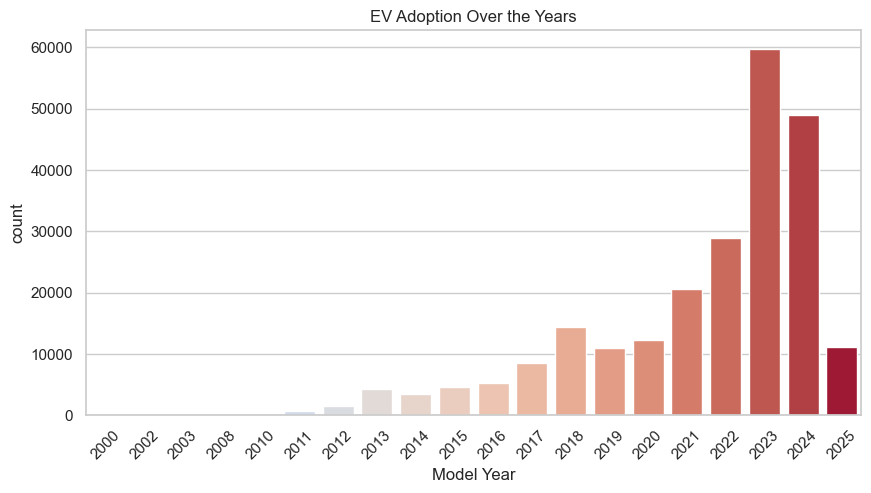

In [7]:
###  Trend of EV Adoption Over Time ###
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Model Year"], hue=df["Model Year"], palette="coolwarm", order=sorted(df["Model Year"].unique()))
plt.legend().remove()  # Remove the automatic legend
plt.title("EV Adoption Over the Years")
plt.xticks(rotation=45)
plt.show()

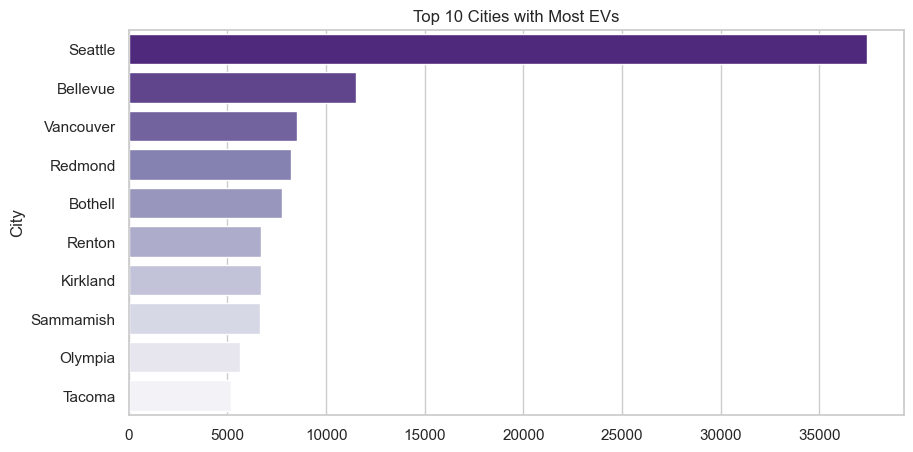

In [44]:

###  Geographical Distribution of EVs ###
plt.figure(figsize=(10, 5))
top_cities = df["City"].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, hue=top_cities.index, palette="Purples_r", legend=False)
plt.title("Top 10 Cities with Most EVs")
plt.show()

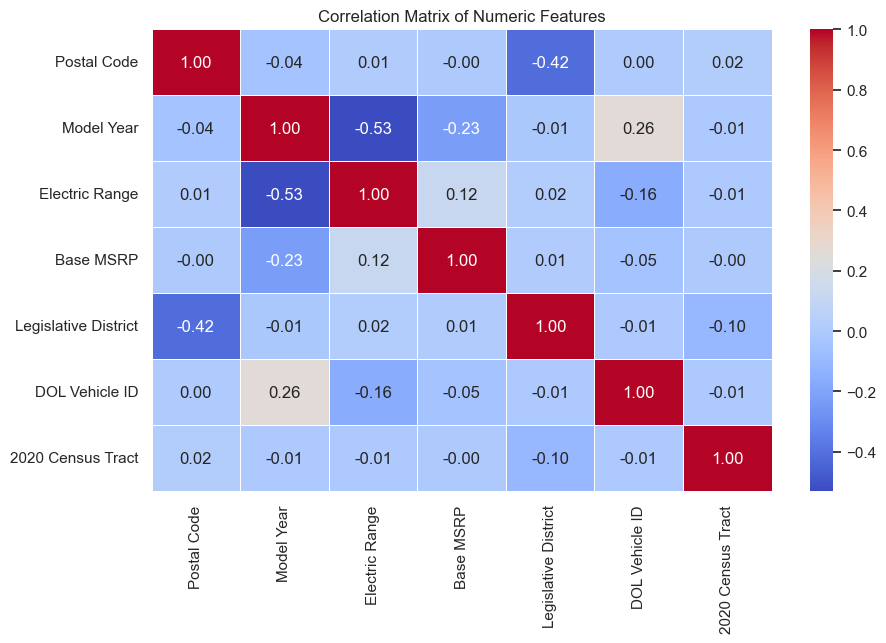

In [9]:
###  Correlation Matrix ###
numeric_df = df.select_dtypes(include=['int64', 'float64'])
#  Compute the correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

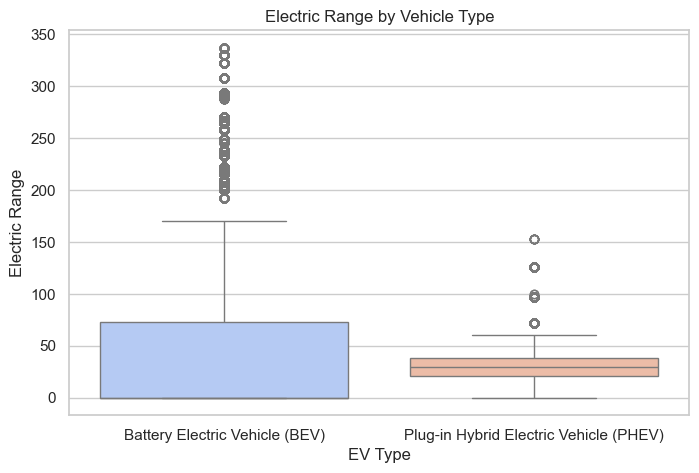

In [10]:
#  Electric Range Box Plot 
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Electric Vehicle Type', y='Electric Range', hue='Electric Vehicle Type', palette='coolwarm', legend=False)
plt.title("Electric Range by Vehicle Type")
plt.ylabel("Electric Range")
plt.xlabel("EV Type")
plt.show()


In [11]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['County'], df['Electric Vehicle Type'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-Square Test:\nChi2 = {chi2}, p-value = {p}")

if p < 0.05:
    print(" Variables are associated.")
else:
    print(" Variables are independent.")


Chi-Square Test:
Chi2 = 2367.215758043645, p-value = 0.0
 Variables are associated.


In [12]:
from scipy.stats import ttest_ind

bev = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']['Electric Range'].dropna()
phev = df[df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']['Electric Range'].dropna()

t_stat, p_val = ttest_ind(bev, phev, equal_var=False)
print(f"T-Test Result:\nT-Statistic = {t_stat}, p-value = {p_val}")

if p_val < 0.05:
    print("Statistically significant difference in electric ranges.")
else:
    print("No significant difference in electric ranges.")


T-Test Result:
T-Statistic = 83.30906233235721, p-value = 0.0
Statistically significant difference in electric ranges.


In [13]:
import numpy as np
from scipy.stats import norm
import pandas as pd

# Assuming 'df' is your DataFrame
# Filter data for BEV and PHEV
bev = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']['Electric Range'].dropna()
phev = df[df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']['Electric Range'].dropna()

# Calculate sample means and sample standard deviations
mean_bev = np.mean(bev)
mean_phev = np.mean(phev)

std_bev = np.std(bev, ddof=1)  # sample standard deviation
std_phev = np.std(phev, ddof=1)  # sample standard deviation

n_bev = len(bev)
n_phev = len(phev)

# Z-test formula
z_stat = (mean_bev - mean_phev) / np.sqrt((std_bev**2 / n_bev) + (std_phev**2 / n_phev))

# p-value for the Z-test (two-tailed test)
p_val = 2 * (1 - norm.cdf(abs(z_stat)))

print(f"Z-Test Result:\nZ-Statistic = {z_stat}, p-value = {p_val}")

if p_val < 0.05:
    print("Statistically significant difference in electric ranges.")
else:
    print("No significant difference in electric ranges.")


Z-Test Result:
Z-Statistic = 83.30906233226442, p-value = 0.0
Statistically significant difference in electric ranges.
